In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
data = load_diabetes()
X = data.data
y = data.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
kernel_rbf = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel_rbf, n_restarts_optimizer=10, alpha=10.0)
gpr.fit(X_train_r, y_train_r)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=10.0, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [ ]:
y_pred_r = gpr.predict(X_test_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
print(f"RMSE for Gaussian Process Regression: {rmse:.2f}")


RMSE for Gaussian Process Regression: 82.14


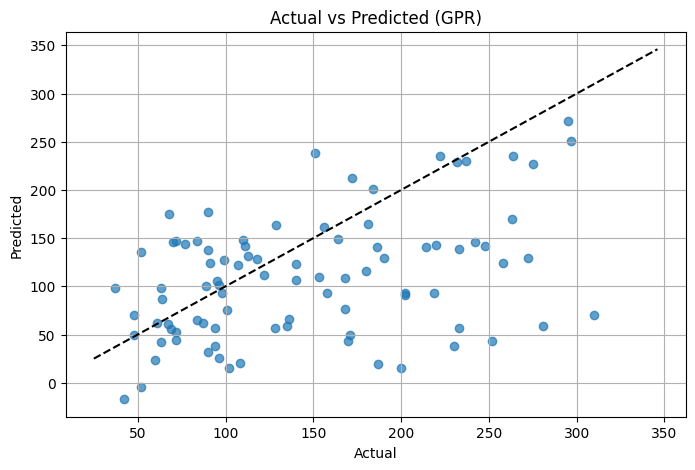

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("Actual vs Predicted (GPR)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

In [ ]:
threshold = np.median(y)
y_class = np.where(y > threshold, 1, 0)


In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


In [ ]:
kernel_gpc = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel_gpc, random_state=42, n_restarts_optimizer=5)
gpc.fit(X_train_c, y_train_c)


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                          n_restarts_optimizer=5, random_state=42)

In [ ]:
y_pred_c = gpc.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy for Gaussian Process Classification: {accuracy:.2f}")


Accuracy for Gaussian Process Classification: 0.75


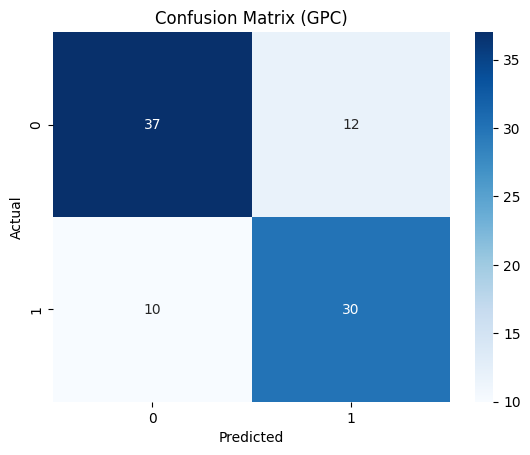

In [ ]:
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (GPC)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        49
           1       0.71      0.75      0.73        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



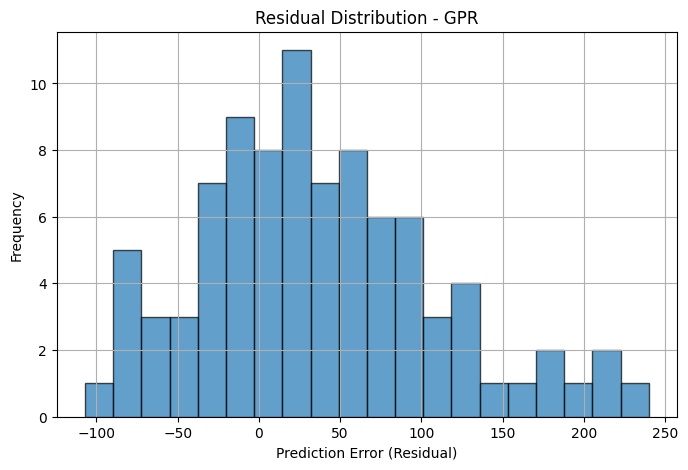

In [ ]:
# Already have y_test_r and y_pred_r from GPR
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title("Residual Distribution - GPR")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


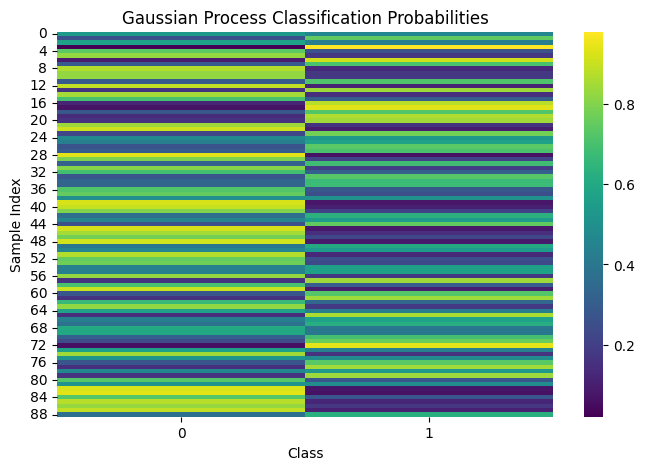

In [ ]:
probs = gpc.predict_proba(X_test_c)

plt.figure(figsize=(8, 5))
sns.heatmap(probs, cmap='viridis', cbar=True)
plt.title("Gaussian Process Classification Probabilities")
plt.xlabel("Class")
plt.ylabel("Sample Index")
plt.show()


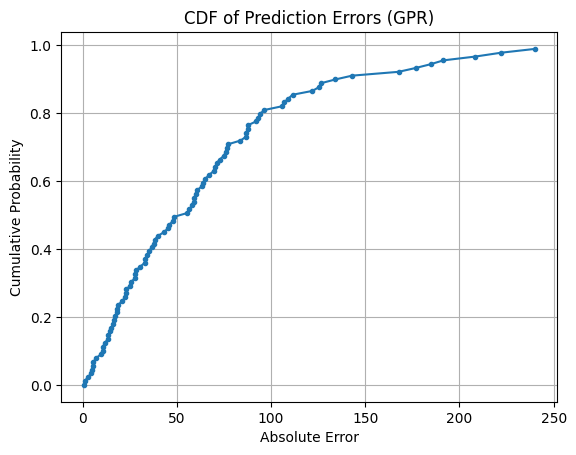

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

residuals = y_test_r - y_pred_r
sorted_residuals = np.sort(np.abs(residuals))
cdf = np.arange(len(sorted_residuals)) / float(len(sorted_residuals))

plt.figure()
plt.plot(sorted_residuals, cdf, marker='.')
plt.xlabel("Absolute Error")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Prediction Errors (GPR)")
plt.grid(True)
plt.show()


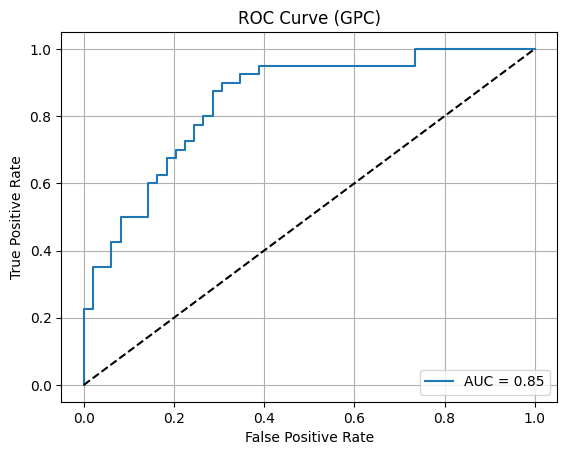

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = gpc.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (GPC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


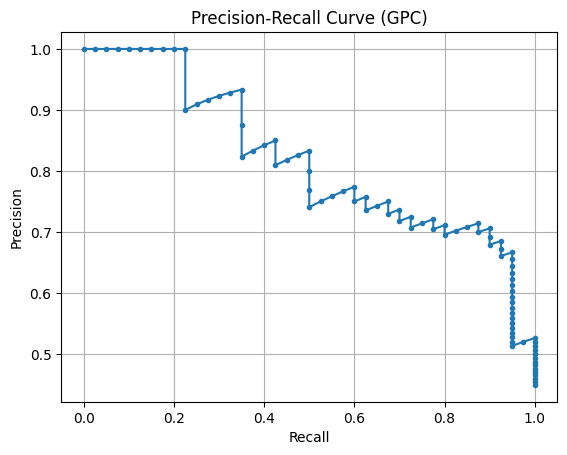

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_c, probs)

plt.figure()
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve (GPC)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: Converg

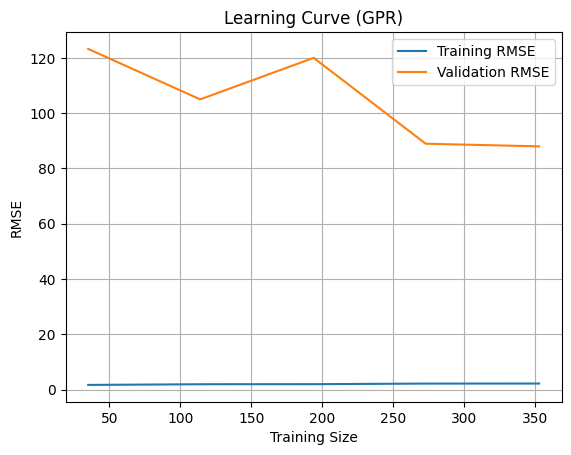

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    gpr, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_root_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training RMSE")
plt.plot(train_sizes, test_scores_mean, label="Validation RMSE")
plt.title("Learning Curve (GPR)")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()
